In [1]:
import sys
sys.path.append("..")
sys.path.append("../src")
from src.utils.plotting import plot_all_barplots

# Reward distro across time

In [7]:
reward = [0.493, 0.5070000000000001, 0.773, 0.22700000000000004]
reward1 = [0.5490000000000003, 0.5546000000000002, 0.6610000000000003, 0.5518000000000002]
reward2 = [0.5863333333333336, 0.5894444444444447, 0.6485555555555558, 0.5878888888888891]
rewards = [reward, reward1, reward2]
rewards

[[0.493, 0.5070000000000001, 0.773, 0.22700000000000004],
 [0.5490000000000003,
  0.5546000000000002,
  0.6610000000000003,
  0.5518000000000002],
 [0.5863333333333336,
  0.5894444444444447,
  0.6485555555555558,
  0.5878888888888891]]

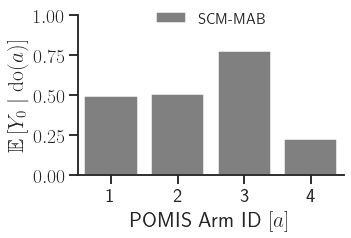

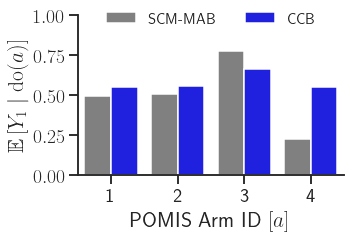

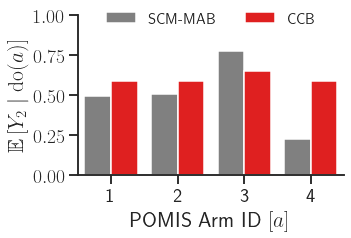

In [9]:
plot_all_barplots(rewards, True)

# Cumulative regret

In [ ]:
import numpy as np
import multiprocessing
from npsem.NIPS2018POMIS_exp.test_bandit_strategies import compute_cumulative_regret 
from npsem.utils import with_default
from npsem.viz_util import sparse_index

In [ ]:
temporal_index = 1
target = 'Y_1'
# Check that indices line up for this time-slice
target_var_only, target_var_temporal_index = target.split("_")
assert int(target_var_temporal_index) == temporal_index

# SEM
SEM = testSEM()

# Create SCM
scm = StructuralCausalModel(
    G=m.causal_diagrams[temporal_index],
    F=SEM,
    P_U=m.P_U,
    D=m.domains,
    more_U=m.more_U,
)

#  Convert time-slice SCM to bandit machine
past_interventions = [{"Z":0}]
num_simulation_repeats = 100
horizon=5000
results, mu = main_experiment_ccb(
    scm, target_var_only, past_interventions, num_simulation_repeats, horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

In [ ]:
num_simulation_repeats = 100
horizon=5000
results_scmmab, mu_scmmab = main_experiment_ccb(
    scm, target_var_only, None, num_simulation_repeats, horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

In [ ]:
mu_star = max(mu_scmmab)
out_scmmab = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results_scmmab[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 2000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out_scmmab[pi] = [time_points, mean_x, lower, upper]

plot_CR(out_scmmab, 'scmmab')

In [ ]:
mu_star = max(mu)
out = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 2000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out[pi] = [time_points, mean_x, lower, upper]

plot_CR(out, 'ccb')